## Data Preprocessing

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
path = "DATASET-balanced.csv"
data = pd.read_csv(path)
data['LABEL'] = data['LABEL'].map({"REAL":1,"FAKE":0})

In [3]:
data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975,1
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128,1
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982,1
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419,1


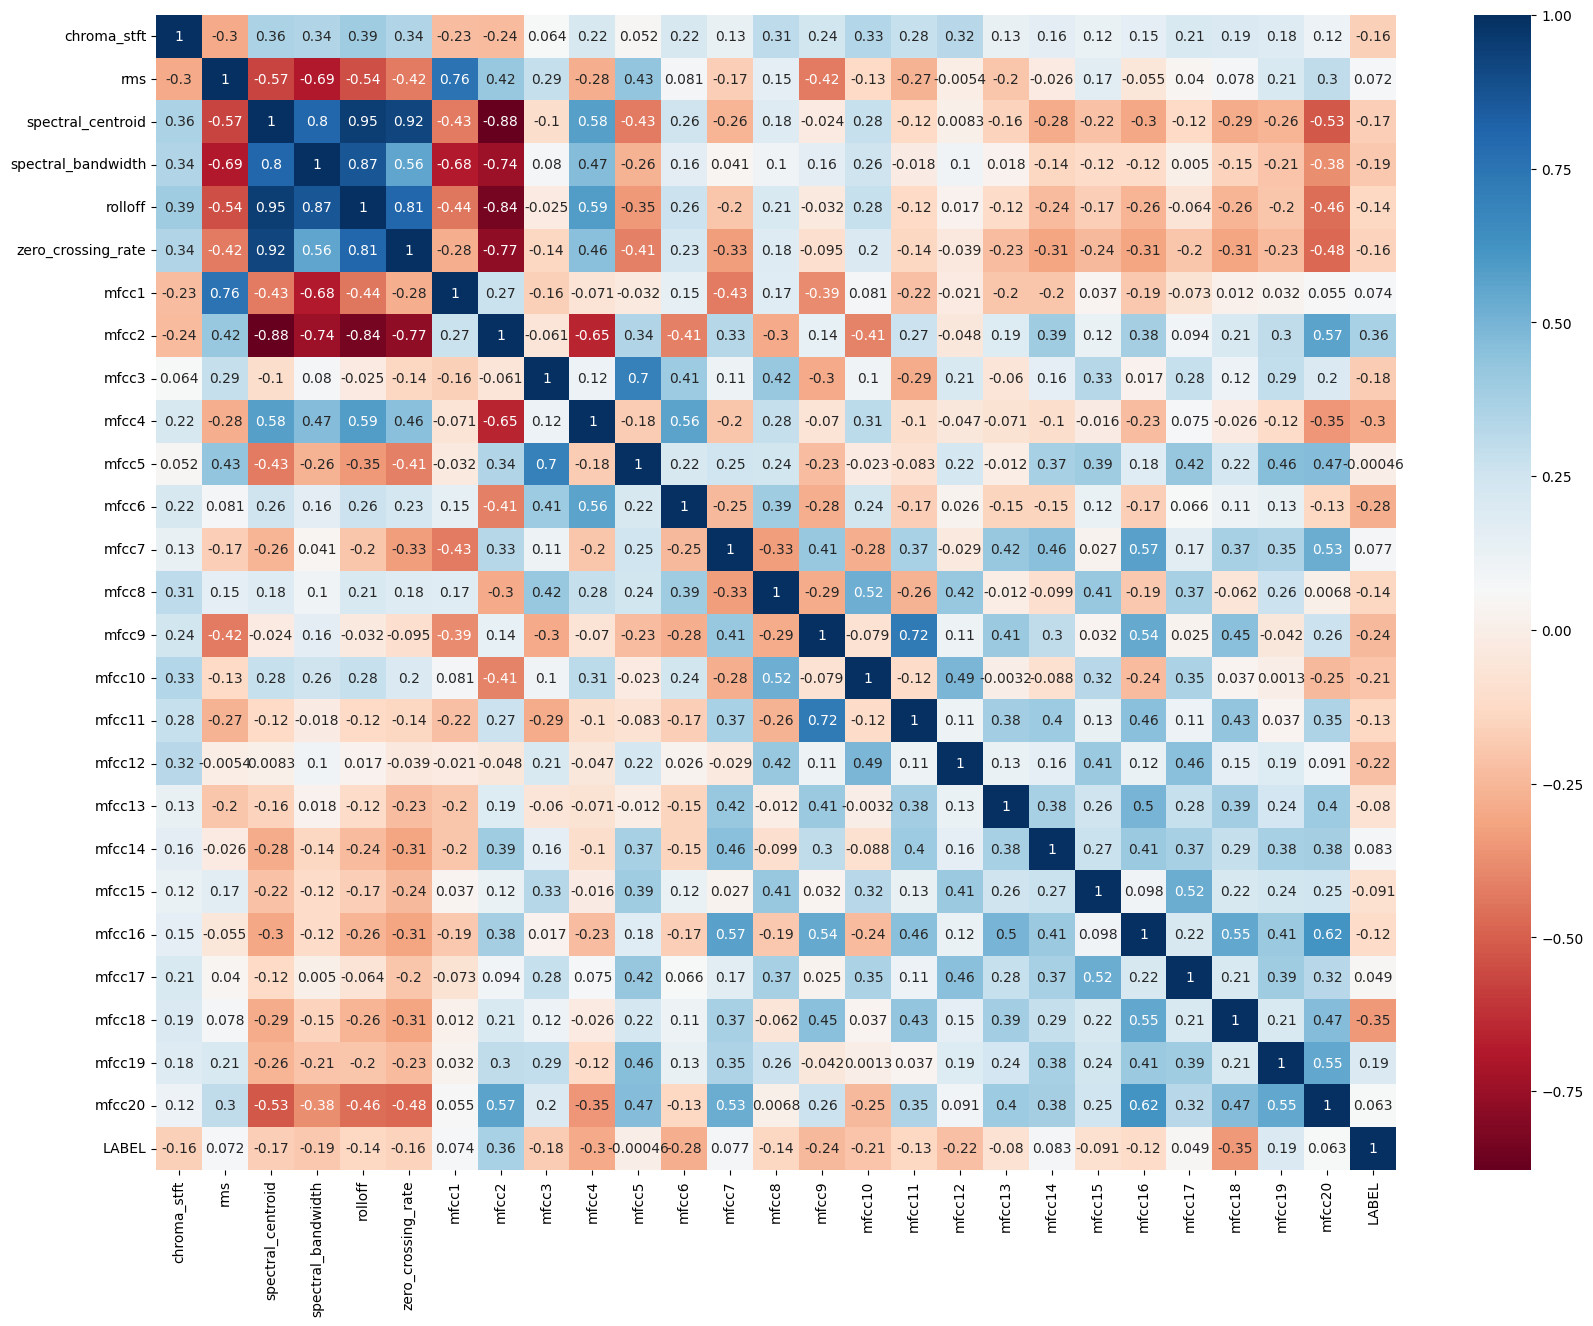

In [4]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='RdBu',annot=True)

plt.show()

In [5]:
data.drop(columns=["mfcc18","mfcc4"],inplace=True)
data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,-0.092606,...,-14.181895,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,-5.013138,-6.779060,0
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,8.610174,...,0.372541,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-9.537907,-8.494421,0
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,-9.747897,...,-3.099179,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-3.922354,-7.033001,0
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,1.098719,...,1.513633,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-3.654926,-3.274857,0
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,-3.085768,...,11.086248,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,-1.793357,-5.060998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,-23.751667,...,-2.950688,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-4.483765,-3.355975,1
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,39.615837,...,-2.910435,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,2.171270,-1.660128,1
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,-30.417339,...,-17.552000,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-4.405540,-15.869982,1
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,31.465832,...,-7.348275,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,3.811063,3.948419,1


In [6]:
x = data.drop(columns=['LABEL'],axis=1)
y = data.iloc[:,-1]
y
# data splite in x , y    lable split from actual

0        0
1        0
2        0
3        0
4        0
        ..
11773    1
11774    1
11775    1
11776    1
11777    1
Name: LABEL, Length: 11778, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split   #split x train and y train  making 80 traning and 20 testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

#scaling

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)


In [10]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [11]:
y_pred = rf.predict(x_test)

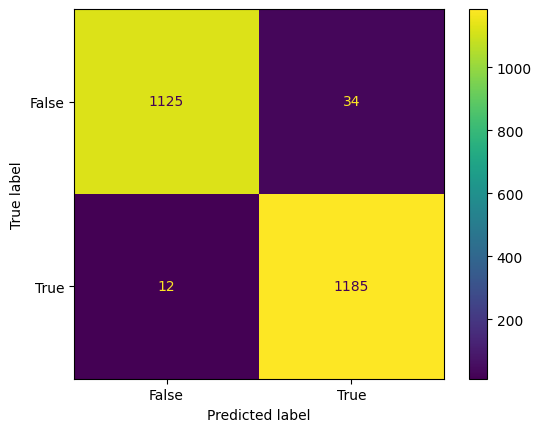

In [12]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)      #accuracy score

0.9804753820033956

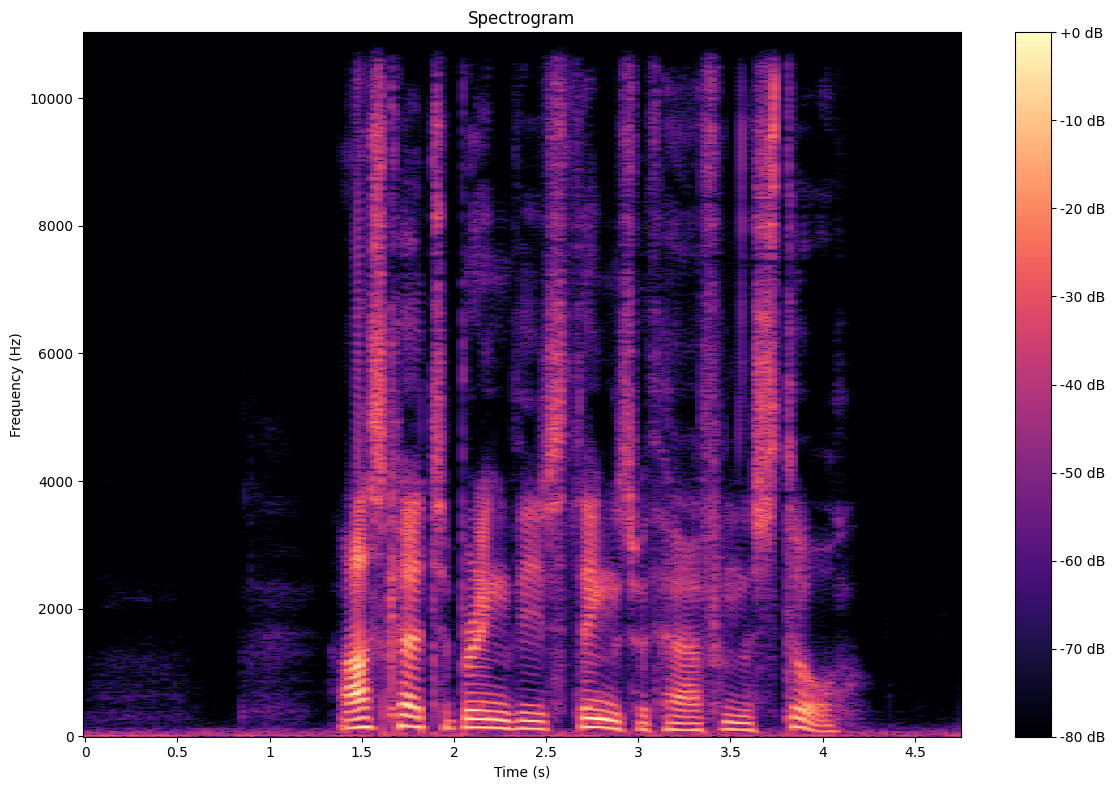

[0.53661335, 0.053871542, 1747.5625977349237, 2006.9487821669652, 3212.75390625, 0.07728420350609756, -356.91876, 81.191025, 11.767907, 16.688168, 6.090096, 10.443744, 7.575095, -6.2769747, 1.8538393, 5.786631, 6.802814, 3.3471265, -0.40263095, 1.219654, 8.649328, -1.8079833, 1.6473581, 4.238284]


In [26]:
import librosa as lb
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def extract_feature(path):
    # Load the audio file
    y, sr = lb.load(path)
    features = []
    
    # Extract various features
    chroma_stft = np.mean(lb.feature.chroma_stft(y=y, sr=sr))
    spct_cent   = np.mean(lb.feature.spectral_centroid(y=y, sr=sr))
    spect_band  = np.mean(lb.feature.spectral_bandwidth(y=y, sr=sr))
    rollof      = np.mean(lb.feature.spectral_rolloff(y=y, sr=sr))
    rms         = np.mean(lb.feature.rms(y=y))
    zero_crossing_rate = np.mean(lb.feature.zero_crossing_rate(y=y))
    
    # Append features to list
    features.append(chroma_stft)
    features.append(rms)
    features.append(spct_cent)
    features.append(spect_band)
    features.append(rollof)
    features.append(zero_crossing_rate)
    
    # Extract MFCCs and modify them (removing coefficients at indices 3 and 17)
    mfccs = lb.feature.mfcc(y=y, sr=sr)
    mfccs = np.delete(mfccs, 3, axis=0)
    mfccs = np.delete(mfccs, 17, axis=0)
    
    # Compute the Short-Time Fourier Transform (STFT) and convert to dB
    D = lb.stft(y)
    S_db = lb.amplitude_to_db(np.abs(D), ref=np.max)
    
    # Plot the spectrogram
    plt.figure(figsize=(12, 8))
    lb.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()
    
    # Append the mean of each MFCC coefficient to the features list
    for mean in np.mean(mfccs, axis=1):
        features.append(mean)
    
    return features

# Example usage:
path = "Testing_set/Original/original_british_male_1.wav"
f = extract_feature(path)
print(f)

In [20]:
f

[0.2870412,
 0.15283692,
 1234.9360229699387,
 1365.6447458068142,
 2200.872802734375,
 0.07237484580592106,
 -326.6923,
 110.89048,
 24.35603,
 24.94151,
 0.61767256,
 -12.477981,
 -20.617554,
 -14.938138,
 -7.4748397,
 -2.8298542,
 6.9180202,
 -0.65241617,
 -1.1141512,
 -2.0795817,
 -6.7825894,
 -9.90738,
 -3.2912796,
 -8.832858]

In [21]:
pred = rf.predict([f])
pred

array([0], dtype=int64)

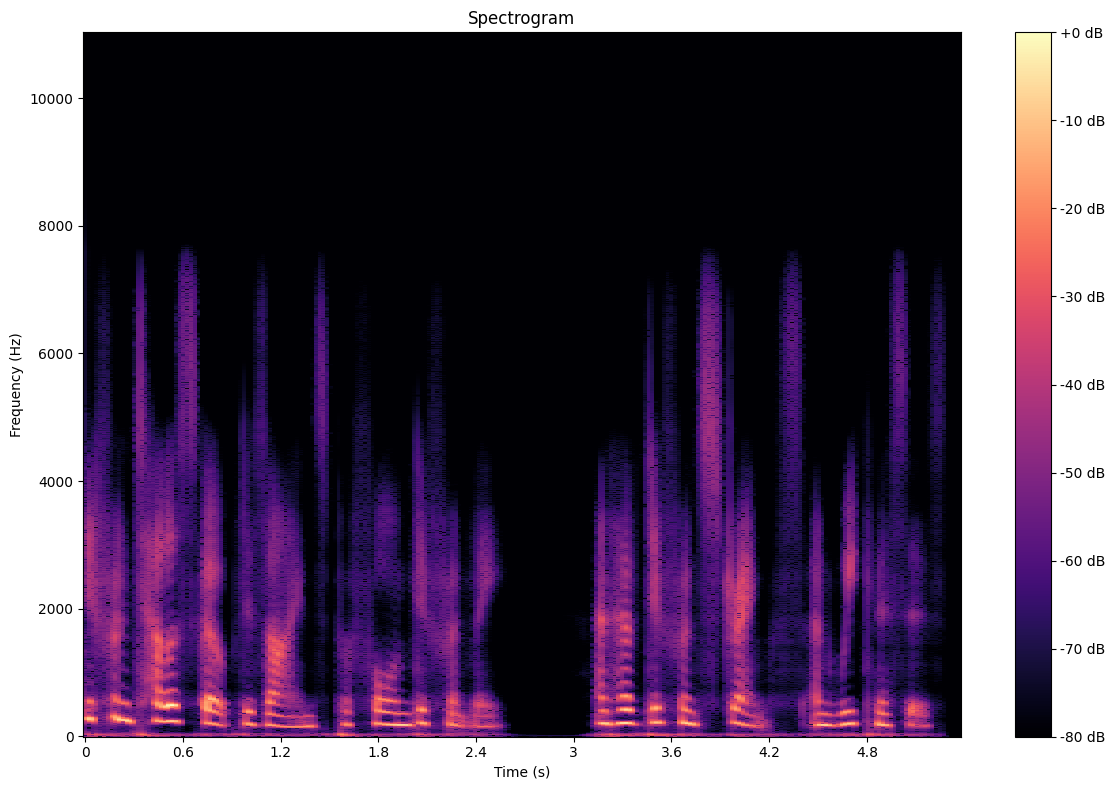

In [27]:
fake = extract_feature("Testing_set/Cloned/synthesized_1.wav")


In [28]:
fake = scale.transform([fake])

C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
pred = rf.predict(fake)
pred

array([0], dtype=int64)

### Importing the dataset

In [31]:
dataset = pd.read_csv("DATASET-balanced.csv")
X = dataset.iloc[:,:-1].values   #data feature in x not last col
y = dataset.iloc[:,-1].values    #lables

X = np.delete(X, 9, 1)
X = np.delete(X, 22, 1)

In [32]:
from sklearn import preprocessing   #ml sacling performance

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [33]:
print(X[0])
print(len(X))
print(y)

[ 3.38055000e-01  2.79480000e-02  2.84294887e+03  4.32291676e+03
  6.57058619e+03  4.10500000e-02 -4.62169586e+02  9.03112720e+01
  1.90737690e+01 -9.26060000e-02  5.96393300e+00 -1.20731190e+01
 -1.52692500e+00 -6.73584500e+00 -9.34483100e+00 -1.41818950e+01
 -6.68656400e+00  9.02086000e-01 -7.25155100e+00 -1.19834200e+00
  4.74740300e+00 -4.98627900e+00 -5.01313800e+00 -6.77906000e+00]
11778
[0 0 0 ... 1 1 1]


### Splitting the dataset into the Training set and Test set

In [34]:
from sklearn.model_selection import train_test_split    #80% teaning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [35]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#scaling the high value data
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Classification Models

In [36]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter = 1000)
MLP_classifier.fit(X_train, y_train)
y_pred = MLP_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 99.4482%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       1.00      0.99      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1220    5]
 [   8 1123]]


### GB Model

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train, y_train)
y_pred = GB_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 95.8404%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1225
           1       0.97      0.94      0.96      1131

    accuracy                           0.96      2356
   macro avg       0.96      0.96      0.96      2356
weighted avg       0.96      0.96      0.96      2356

Confusion Matrix:
[[1193   32]
 [  66 1065]]


### LightGBM Model

In [38]:
from lightgbm import LGBMClassifier
LGBM_classifier = LGBMClassifier()
LGBM_classifier.fit(X_train, y_train)
y_pred = LGBM_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 4758, number of negative: 4664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504988 -> initscore=0.019954
[LightGBM] [Info] Start training from score 0.019954
Accuracy = 98.7691%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1225
           1       0.99      0.98      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1216    9]
 [  20 1111]]


### CatBoost Model

In [39]:
from catboost import CatBoostClassifier
CB_classifier = CatBoostClassifier(logging_level='Silent')
CB_classifier.fit(X_train, y_train)
y_pred = CB_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.8964%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1225
           1       0.99      0.98      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1218    7]
 [  19 1112]]


### XGBoost Model

In [40]:
from xgboost import XGBClassifier
XGBC_classifier = XGBClassifier()
XGBC_classifier.fit(X_train, y_train)
y_pred = XGBC_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.8115%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1225
           1       0.99      0.98      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1217    8]
 [  20 1111]]


### Extra Trees Model

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
ET_classifier = ExtraTreesClassifier()
ET_classifier.fit(X_train, y_train)
y_pred = ET_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 99.1511%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       1.00      0.99      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1221    4]
 [  16 1115]]


### Random Forest Classification


In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 98.3022%
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1225
           1       0.99      0.97      0.98      1131

    accuracy                           0.98      2356
   macro avg       0.98      0.98      0.98      2356
weighted avg       0.98      0.98      0.98      2356

Confusion Matrix:
[[1216    9]
 [  31 1100]]


### Decision Tree Model

In [43]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(X_train, y_train)
y_pred = decision_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 93.1664%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1225
           1       0.93      0.93      0.93      1131

    accuracy                           0.93      2356
   macro avg       0.93      0.93      0.93      2356
weighted avg       0.93      0.93      0.93      2356

Confusion Matrix:
[[1144   81]
 [  80 1051]]


### Logistic Regression model

In [44]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(max_iter = 1000)
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 89.1766%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1225
           1       0.89      0.89      0.89      1131

    accuracy                           0.89      2356
   macro avg       0.89      0.89      0.89      2356
weighted avg       0.89      0.89      0.89      2356

Confusion Matrix:
[[1100  125]
 [ 130 1001]]


### Kernal SVM

In [45]:
from sklearn.svm import SVC
kernal_classifier = SVC(kernel = 'rbf')
kernal_classifier.fit(X_train, y_train)
y_pred = kernal_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 99.4907%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      0.99      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1219    6]
 [   6 1125]]


### Support Vector Machine

In [46]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 89.0068%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1225
           1       0.90      0.87      0.88      1131

    accuracy                           0.89      2356
   macro avg       0.89      0.89      0.89      2356
weighted avg       0.89      0.89      0.89      2356

Confusion Matrix:
[[1113  112]
 [ 147  984]]


### K-Nearest Neighbors (K-NN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
K_nearest_classifier = KNeighborsClassifier()
K_nearest_classifier.fit(X_train, y_train)
y_pred = K_nearest_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 99.2784%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1225
           1       0.99      1.00      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1213   12]
 [   5 1126]]


### Naive Bayes model

In [48]:
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()
naive_classifier.fit(X_train,y_train)
y_pred = naive_classifier.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy = 79.8812%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1225
           1       0.83      0.73      0.78      1131

    accuracy                           0.80      2356
   macro avg       0.80      0.80      0.80      2356
weighted avg       0.80      0.80      0.80      2356

Confusion Matrix:
[[1054  171]
 [ 303  828]]


## Voting Classifier Model

In [49]:
from sklearn.ensemble import VotingClassifier

from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(max_iter = 1000)

from sklearn.ensemble import GradientBoostingClassifier
GB_classifier = GradientBoostingClassifier()

from lightgbm import LGBMClassifier
LGBM_classifier = LGBMClassifier()

from xgboost import XGBClassifier
XGBC_classifier = XGBClassifier()

from sklearn.ensemble import ExtraTreesClassifier
ET_classifier = ExtraTreesClassifier()

from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()

from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(max_iter = 1000)

from sklearn.svm import SVC
kernal_classifier = SVC(kernel = 'rbf')

from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear')


ensemble = VotingClassifier(
    estimators=[
        ('MLPC', MLP_classifier),
        ('GBC', GB_classifier),
        ('LGBMC', LGBM_classifier),
        ('XGBC', XGBC_classifier),
        ('ETC', ET_classifier),
        ('RFC', random_forest_classifier),
        ('DTC', decision_classifier),
        ('LC', logistic_classifier),
        ('KSVMC', kernal_classifier),
        ('SVMC', svm_classifier)
        ],
    voting='hard')
ensemble.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4758, number of negative: 4664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504988 -> initscore=0.019954
[LightGBM] [Info] Start training from score 0.019954


VotingClassifier(estimators=[('MLPC', MLPClassifier(max_iter=1000)),
                             ('GBC', GradientBoostingClassifier()),
                             ('LGBMC', LGBMClassifier()),
                             ('XGBC',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            featu...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('ETC', ExtraTreesClassifier()),
                             ('RFC', RandomForestClassifier()),
                             ('DTC', DecisionTreeClassifier()),
                             ('LC', LogisticRegression(max_iter=1000)),
                             ('KSVMC', SVC()), ('SVMC', SVC(kernel='linear'))])

In [58]:
y_pred = ensemble.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred)*100:2.4f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("----------------------------")


Accuracy = 99.0238%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       1.00      0.98      0.99      1131

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356

Confusion Matrix:
[[1220    5]
 [  18 1113]]
----------------------------


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Neural Network : 99.36332767402376


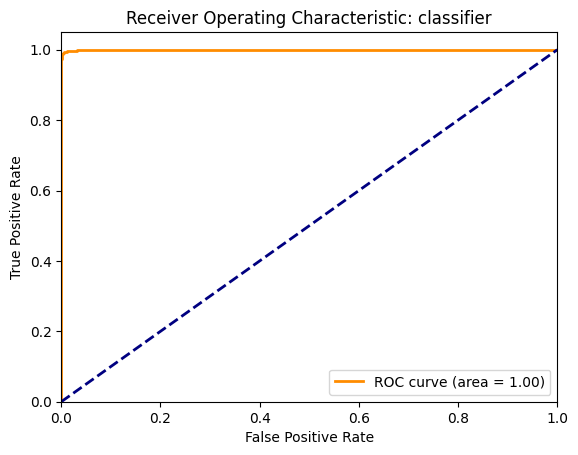

GradientBoostingClassifier:  95.84040747028862


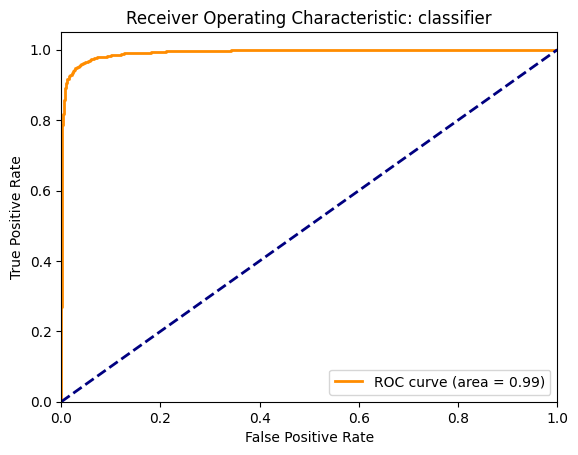

[LightGBM] [Info] Number of positive: 4758, number of negative: 4664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 9422, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504988 -> initscore=0.019954
[LightGBM] [Info] Start training from score 0.019954
LGBM_classifier:  98.76910016977929


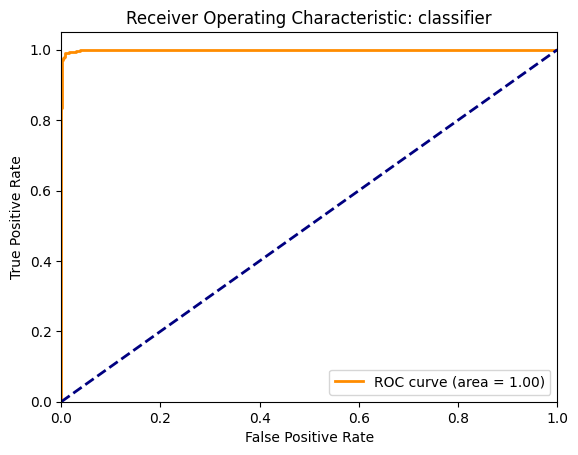

CatBoost : 98.89643463497453


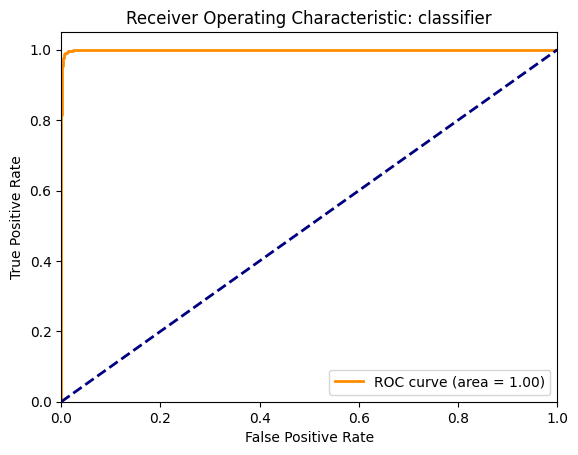

XGB : 98.81154499151104


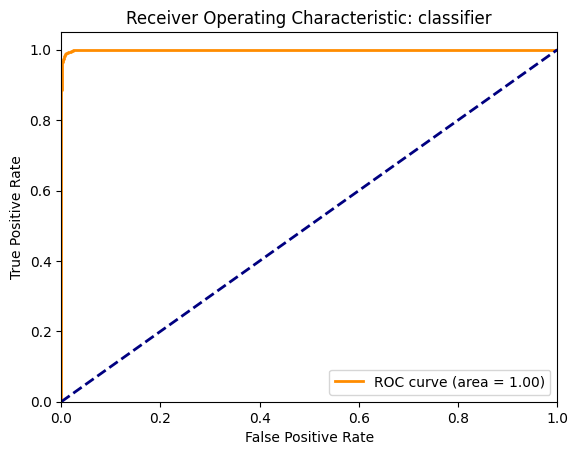

ExtraTreesClassifier : 99.02376910016977


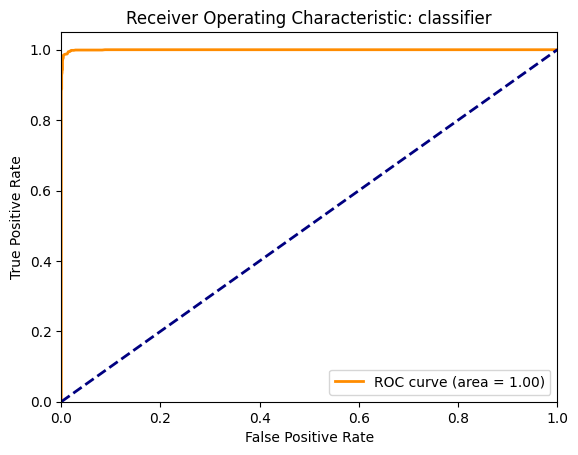

RandomForest : 98.4295415959253


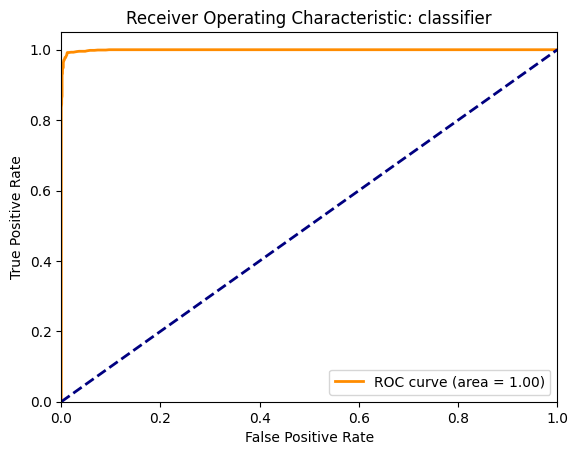

DecisionTree : 92.65704584040748


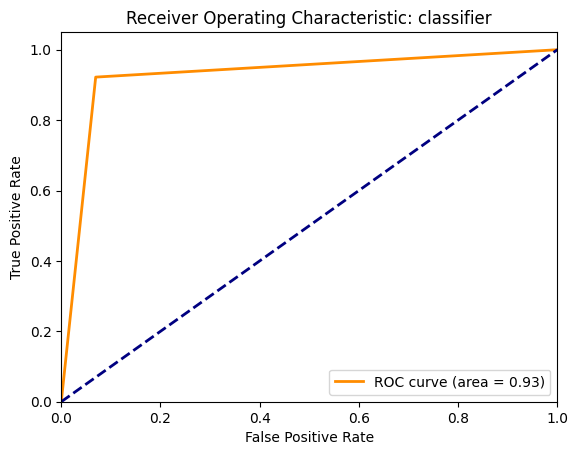

LogisticRegression : 89.17657045840407


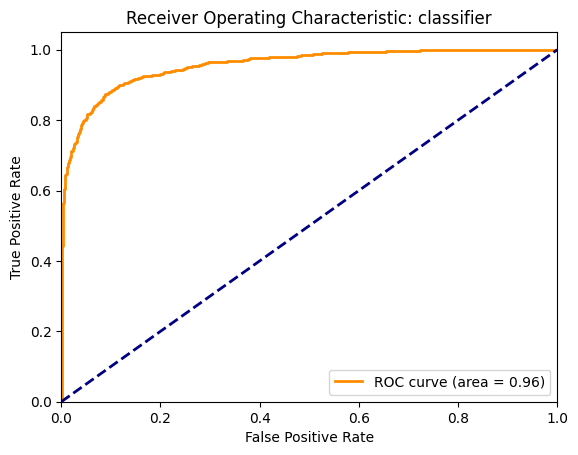

Kernel SVM : 99.49066213921901


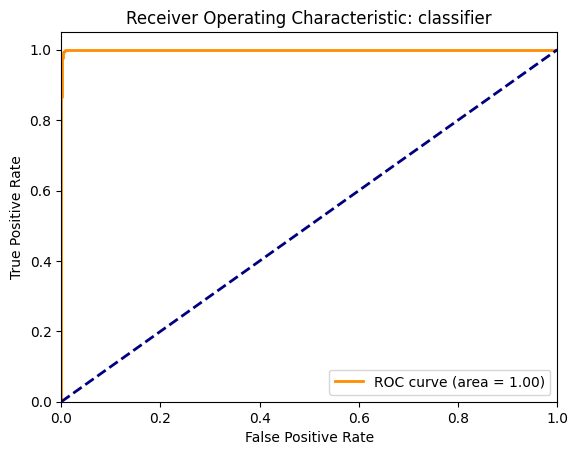

Linear SVM : 89.00679117147709


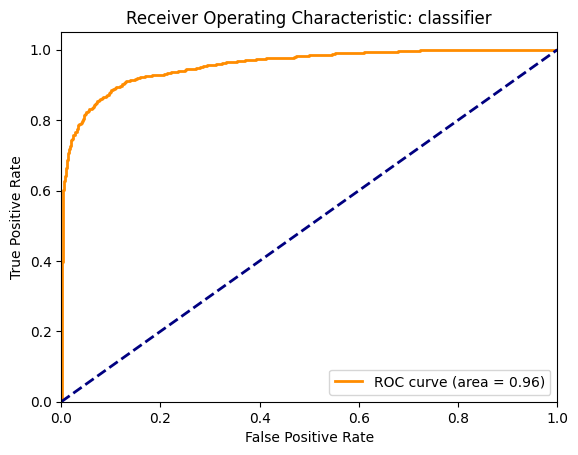

SVM : 99.49066213921901


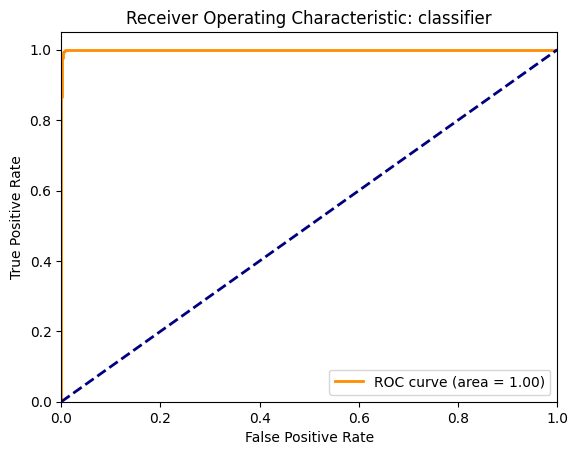

KNeighbours : 99.27843803056027


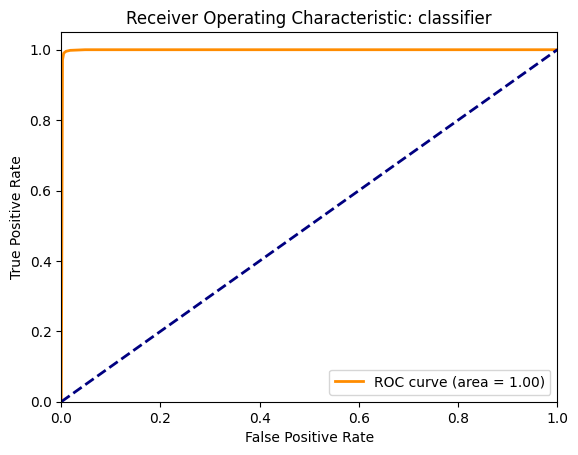

Naive Bayes : 79.88115449915111


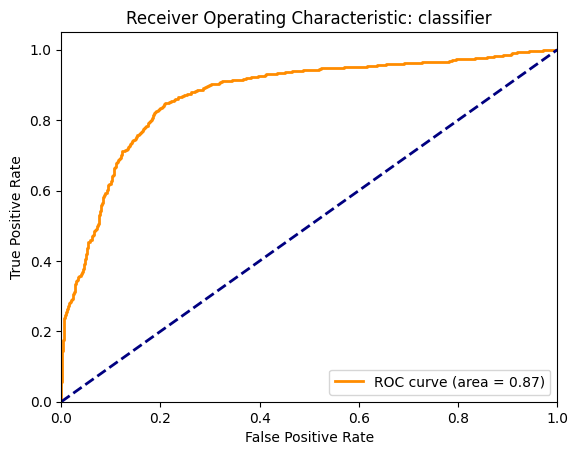

C:\Users\ayush\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier : 90.87436332767402


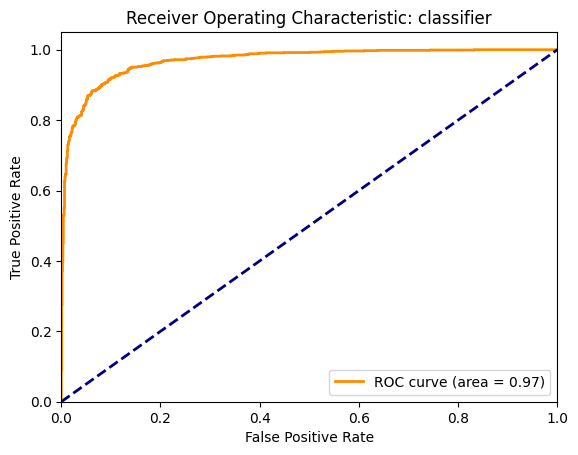

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

def probability_scores(classifier, method):
    if hasattr(classifier, method):
        return getattr(classifier, method)(X_test)[:, 1]
    else:
        return classifier.decision_function(X_test)

def plot_roc_curve(fpr, tpr, classifier, title, y_train, prob_score):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_train, prob_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic' + title)
    plt.legend(loc="lower right")
    plt.show()

classifiers = [['Neural Network :', MLPClassifier(max_iter = 1000)],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['LGBM_classifier: ', LGBMClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')],
               ['XGB :', XGBClassifier()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)],
               ['Kernel SVM :', SVC(kernel = 'rbf')],
               ['Linear SVM :', SVC(kernel = "linear")],
               ['SVM :', SVC()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['Naive Bayes :', GaussianNB()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ]

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(name, accuracy_score(y_test, y_pred)*100)
    prob_score = probability_scores(classifier,"predict_proba")
    fpr,tpr,threshold = roc_curve(y_test,prob_score)
    plot_roc_curve(fpr,tpr, classifier ,": classifier",y_test,prob_score)